**OBJECTIVE**

**Hand** **Written** **Digit** **Prediction** - **Classification** **Analysis**









The digit dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents

 **Data** **Source**

In [4]:
from sklearn.datasets import load_digits

**Import** **Library**

In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

**Import** **Data**

In [5]:
df = load_digits()

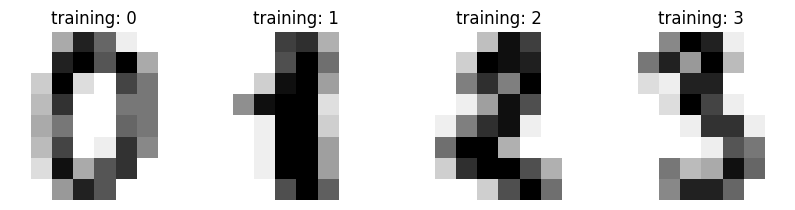

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"training: {label}")


**Data** **Preprocessing**

**Flatten** **Image**

**8x8** **image**
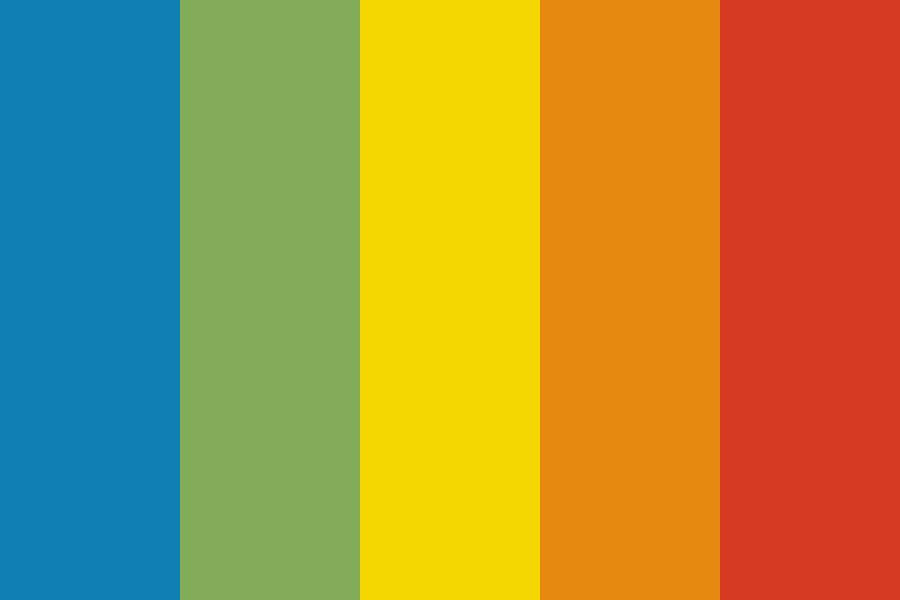

**Flatten** **Image**
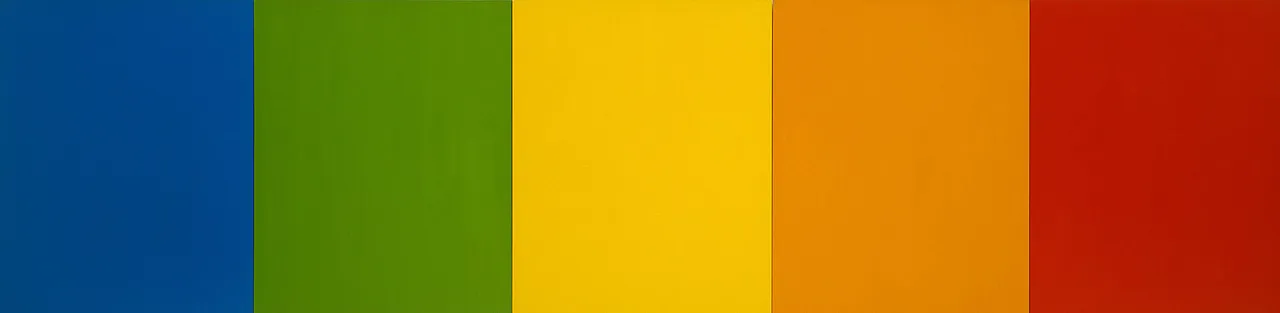

**Describe** **Data**

In [38]:
df.describe()

AttributeError: describe

In [7]:
df.images.shape

(1797, 8, 8)

In [8]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
len(df.images)

1797

In [10]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0].shape

(64,)

In [13]:
data.shape

(1797, 64)

**Scaling** **Image** **data**

In [14]:
data.max()

16.0

In [15]:
data = data/16

In [16]:
data.min()

0.0

In [17]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train** **Test** **Split** **Data**

In [18]:
from sklearn.model_selection import train_test_split


Define Target Variable (y) and Feature variables (X)

In [39]:
X = data
y = df.target

In [40]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [27]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1257, 64), (1257,), (540, 64), (540,))

**Modeling** (**Random** **Forest** **Model**)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict** **The** **Test** **Data**

In [31]:
y_pred = rf.predict(x_test)

In [32]:
y_pred

array([4, 6, 8, 3, 1, 3, 8, 9, 3, 2, 4, 4, 3, 1, 1, 0, 4, 6, 4, 5, 4, 5,
       5, 8, 2, 5, 1, 0, 9, 4, 6, 9, 5, 5, 3, 4, 1, 7, 9, 4, 7, 9, 4, 0,
       1, 6, 3, 2, 2, 1, 8, 8, 4, 6, 6, 6, 9, 3, 0, 5, 6, 2, 4, 9, 1, 1,
       4, 6, 4, 1, 2, 1, 0, 1, 3, 5, 8, 2, 2, 6, 4, 3, 9, 5, 3, 6, 7, 7,
       2, 3, 4, 3, 7, 2, 5, 3, 4, 2, 9, 0, 5, 5, 9, 4, 6, 4, 2, 6, 0, 9,
       0, 7, 8, 6, 2, 2, 1, 4, 4, 9, 0, 9, 7, 1, 9, 5, 5, 7, 2, 8, 2, 3,
       8, 7, 0, 8, 2, 0, 0, 7, 9, 3, 8, 3, 8, 0, 5, 1, 5, 5, 0, 1, 0, 0,
       2, 4, 4, 7, 5, 6, 6, 5, 5, 3, 8, 8, 5, 6, 6, 2, 1, 4, 7, 2, 7, 7,
       0, 0, 2, 2, 6, 9, 7, 3, 5, 5, 3, 4, 3, 5, 4, 2, 2, 4, 8, 8, 1, 7,
       2, 6, 3, 9, 9, 7, 1, 0, 2, 0, 7, 7, 3, 8, 4, 6, 8, 4, 7, 9, 7, 4,
       8, 7, 2, 8, 8, 1, 7, 2, 1, 8, 2, 5, 6, 7, 1, 6, 8, 7, 8, 1, 8, 3,
       9, 8, 4, 2, 4, 6, 7, 0, 6, 5, 2, 3, 6, 7, 6, 3, 5, 3, 9, 0, 7, 4,
       9, 5, 6, 6, 8, 7, 4, 4, 2, 0, 1, 0, 5, 0, 6, 9, 3, 3, 9, 5, 2, 8,
       2, 6, 7, 5, 5, 0, 8, 8, 9, 1, 1, 4, 5, 3, 6,

**Model** **accuracy**

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test,y_pred)

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  1,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0, 53,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 48,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  2, 48]])

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       0.95      1.00      0.97        56
           2       1.00      1.00      1.00        58
           3       0.98      0.92      0.95        61
           4       1.00      1.00      1.00        50
           5       0.96      0.98      0.97        52
           6       1.00      0.95      0.97        56
           7       0.93      0.96      0.94        53
           8       0.87      0.91      0.89        53
           9       0.92      0.89      0.91        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



**Explanation**

Overall Performance:
Accuracy: 96% indicates the model performs well overall.
Macro Avg and Weighted Avg: Both are consistent at 96%, suggesting no significant class imbalance issues.